In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd


     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 450kB 36.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b6524be332bf073c0a7ab41769081e1fcc457d4468f27c72a8fb264419d7ea84
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: t

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras

In [0]:
pd.set_option("display.precision", 8)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_root='/content/drive/My Drive/seperate_none image dataset/cooler-ac'

In [10]:
IMAGE_SHAPE = (224, 224)

TRAINING_DATA_DIR = str(data_root)

print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(

TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)



/content/drive/My Drive/InCity Image classification/seperate_none image dataset/cooler-ac
Found 72 images belonging to 2 classes.
Found 295 images belonging to 2 classes.


In [11]:
image_batch_train, label_batch_train = next(iter(train_generator))

print("Image batch shape: ", image_batch_train.shape)

print("Label batch shape: ", label_batch_train.shape)

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[0])

dataset_labels = np.array([key.title() for key, value in dataset_labels])

print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)
['Ac' 'Cooler']


In [12]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(train_generator,epochs=11,verbose=1,steps_per_epoch=steps_per_epoch,validation_data=valid_generator,validation_steps=val_steps_per_epoch).history

Epoch 1/11
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


10/10 [==============================] - 173s 17s/step - loss: 0.6647 - acc: 0.5926 - val_loss: 0.2627 - val_acc: 0.9306
Epoch 2/11
10/10 [==============================] - 1s 126ms/step - loss: 0.3091 - acc: 0.8690 - val_loss: 0.1330 - val_acc: 0.9167
Epoch 3/11
10/10 [==============================] - 2s 176ms/step - loss: 0.2233 - acc: 0.9174 - val_loss: 0.0909 - val_acc: 0.9583
Epoch 4/11
10/10 [==============================] - 2s 174ms/step - loss: 0.1918 - acc: 0.9233 - val_loss: 0.0780 - val_acc: 0.9722
Epoch 5/11
10/10 [==============================] - 2s 170ms/step - loss: 0.1705 - acc: 0.9427 - val_loss: 0.0713 - val_acc: 0.9722
Epoch 6/11
10/10 [==============================] - 2s 173ms/step - loss: 0.1784 - acc: 0.9382 - val_loss: 0.0597 - val_acc: 0.9722
Epoch 7/11
10/10 [==============================] - 2s 171ms/step - loss: 0.1559 - acc: 0.9354 - val_loss: 0.0569 - val_acc: 0.9722
Epoch 8/11
10/10 [==============================] - 2s 167ms/step - loss: 0.1215 - acc:

In [0]:
"""
SAVED_MODEL = "saved_models/house"

tf.keras.experimental.export_saved_model(model, SAVED_MODEL)

house_model = tf.keras.experimental.load_from_saved_model(SAVED_MODEL,custom_objects={'KerasLayer':hub.KerasLayer})
"""                                                        


'\nSAVED_MODEL = "saved_models/house"\n\ntf.keras.experimental.export_saved_model(model, SAVED_MODEL)\n\nhouse_model = tf.keras.experimental.load_from_saved_model(SAVED_MODEL,custom_objects={\'KerasLayer\':hub.KerasLayer})\n'

In [14]:
val_image_batch, val_label_batch = next(iter(valid_generator))

true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [15]:
tf_model_predictions = model.predict(val_image_batch)

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)

tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")

tf_pred_dataframe

Prediction results for the first elements


,Ac,Cooler
0,0.00432380,0.99567622
1,0.00983169,0.99016833
2,0.99542230,0.00457765
3,0.01481684,0.98518318
4,0.99378079,0.00621924
5,0.79988635,0.20011371
6,0.99883133,0.00116863
7,0.94822252,0.05177746
8,0.00056594,0.99943405
9,0.98869777,0.01130222


In [0]:
tf_pred_dataframe['Predictions'] = 'Yes'


In [17]:
tf_pred_dataframe.head()

,Ac,Cooler,Predictions
0,0.00432380,0.99567622,Yes
1,0.00983169,0.99016833,Yes
2,0.99542230,0.00457765,Yes
3,0.01481684,0.98518318,Yes
4,0.99378079,0.00621924,Yes


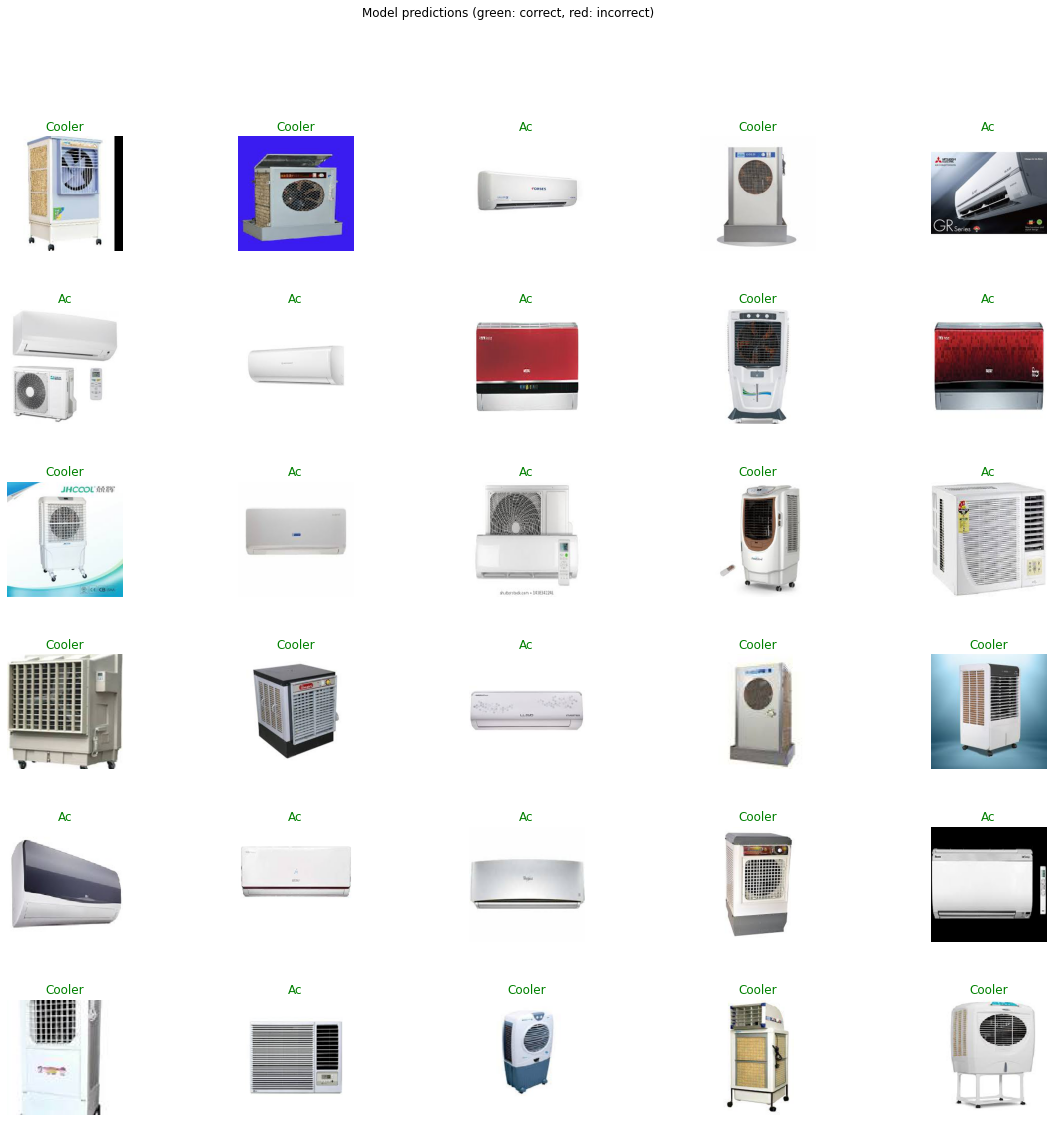

In [18]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [19]:
"""
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : house_model(x))
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)
print("TFLite models and their sizes:")
!ls "tflite_models" -lh
"""

'\n# Get the concrete function from the Keras model.\nrun_model = tf.function(lambda x : house_model(x))\n# Save the concrete function.\nconcrete_func = run_model.get_concrete_function(\ntf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)\n)\n# Convert the model\nconverter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])\nconverted_tflite_model = converter.convert()\nopen(TFLITE_MODEL, "wb").write(converted_tflite_model)\n# Convert the model to quantized version with post-training quantization\nconverter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])\nconverter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]\ntflite_quant_model = converter.convert()\nopen(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)\nprint("TFLite models and their sizes:")\n!ls "tflite_models" -lh\n'

In [0]:
import os
import glob
full_path = []
major = os.listdir("/content/drive/My Drive/random_images_-_Google_Search")

for a in major:
        full_path.append("drive/My Drive/random_images_-_Google_Search/"+a)

In [21]:
full_path

['drive/My Drive/random_images_-_Google_Search/asdf (19).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (1).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (5).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (15).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (2).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (7).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (16).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (14).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (8).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (9).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (10).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (3).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (17).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (11).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (18).jpg',
 'drive/My Drive/random_images_-_Google_Search/asdf (4).jpg',


In [22]:
pred=[]
from keras.preprocessing import image

for path in full_path:
  img_width, img_height = 224,224
  img = image.load_img(path, target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis = 0)
  a = model.predict(img)
  num_list = a[0].tolist()
  pred.append(num_list)
print(pred)

Using TensorFlow backend.


[[0.1589926779270172, 0.8410072922706604], [0.283196359872818, 0.7168036103248596], [0.5390670895576477, 0.4609329104423523], [0.09374937415122986, 0.9062505960464478], [0.059184253215789795, 0.940815806388855], [0.7118043303489685, 0.2881956994533539], [0.549113392829895, 0.450886607170105], [0.17618189752101898, 0.823818027973175], [0.16682082414627075, 0.8331791758537292], [0.654158890247345, 0.34584105014801025], [0.005915497429668903, 0.9940845370292664], [0.36792927980422974, 0.6320707201957703], [0.09584922343492508, 0.9041507840156555], [0.042097948491573334, 0.9579020738601685], [0.24537929892539978, 0.7546206712722778], [0.022392578423023224, 0.9776074290275574], [0.03216173127293587, 0.9678383469581604], [0.3256259560585022, 0.6743740439414978], [0.5140005946159363, 0.4859994351863861], [0.15112467110157013, 0.8488753437995911], [0.1423998326063156, 0.857600212097168], [0.2260584533214569, 0.7739415168762207], [0.21669065952301025, 0.783309280872345], [0.2005545049905777, 0.

In [0]:
df = pd.DataFrame(pred)
df.columns = dataset_labels

In [0]:
df['Predictions'] = 'None'


In [25]:
df.head()

,Ac,Cooler,Predictions
0,0.15899268,0.84100729,None
1,0.28319636,0.71680361,None
2,0.53906709,0.46093291,None
3,0.09374937,0.90625060,None
4,0.05918425,0.94081581,None


In [26]:
frames = [tf_pred_dataframe,df]
result = pd.concat(frames)
result.head()

,Ac,Cooler,Predictions
0,0.00432380,0.99567622,Yes
1,0.00983169,0.99016833,Yes
2,0.99542230,0.00457765,Yes
3,0.01481684,0.98518318,Yes
4,0.99378079,0.00621924,Yes


In [0]:
df2 = result

In [0]:
df2['Predictions'] = df2['Predictions'].replace({'Yes': 1, 'None': 0})

In [29]:
df2.head()

,Ac,Cooler,Predictions
0,0.00432380,0.99567622,1
1,0.00983169,0.99016833,1
2,0.99542230,0.00457765,1
3,0.01481684,0.98518318,1
4,0.99378079,0.00621924,1


In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [0]:
X = df2.drop('Predictions',axis=1)
Y = df2['Predictions']


In [0]:
# split data into train and test sets
#seed_house = 20
#seed tv = 8
#seed land, cooler = 18
#seed mobile = 3
#seed stove = 15
seed = 18
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train = X_train.values
X_test = X_test.values

In [0]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)

In [47]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[9 1]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [48]:
print(accuracy_score(y_test, pred))

0.9444444444444444


In [0]:
def none_class(model2, list):
  y = dataset_labels.size
  x = np.array(list).reshape(1, y)
  print(model2.predict(x))

In [0]:
def testing(pathq):
  img_width, img_height = 224,224
  img = image.load_img(pathq, target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis = 0)
  predictions = model.predict(img)
  num_list = predictions[0]
  inp = num_list.tolist()
  max_prob = np.amax(predictions)
  a = none_class(XGB, inp)
  index = np.argmax(predictions)
  if(max_prob >= 0.9): 
    print("Maximum probablity is",max_prob)
    print("Belonging to category",dataset_labels[index])
  elif(max_prob < 0.9):
    if(a != 1):
      print("Image belongs to none of the category.")
      print("Maximum probablity is",max_prob)
    else:
      print("Maximum probablity is",max_prob)
      print("Belonging to category",dataset_labels[index])


In [56]:
path = '/content/drive/My Drive/seperate_none image dataset/cooler-ac/ac/2Q__ (2).jpg'
testing(path)

[1]
Maximum probablity is 0.99902093
Belonging to category Ac


In [0]:
img = keras.preprocessing.image.load_img(
      path, target_size=size
  )

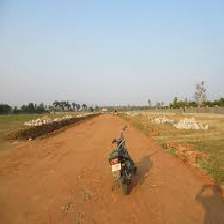

In [0]:
img